In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
X = df.drop(['target',],axis=1)
columns = X.columns
y = df['target']

In [5]:

X_train,X_test, y_train,y_test = train_test_split(X,y.ravel(),test_size=0.2)

In [31]:
class F_B_R_Selection():
    '''
    Implement Forward, Backward or Recursive Feature Selection
    NOTE: Data should be scaled for some processes
    '''
    def __init__(self,problem,model_type='base'):
        '''
        constructor of the class
        args:
            problem: 'regression'/ 'classification'
            model: 'base', 'support_vector','tree','ensemble'
        '''
        
        self.problem = problem
        assert self.problem in ['regression','classification'], "'problem' should be either 'regression' or 'classification'"
        try:
            from mlxtend.feature_selection import SequentialFeatureSelector as SFS
        except ModuleNotFoundError:
            !pip install mlxtend
            from mlxtend.feature_selection import SequentialFeatureSelector as SFS
        
        
        if self.problem =='classification': # if classification
            if model_type=='base':
                from sklearn.linear_model import LogisticRegression
                self.model = LogisticRegression()
            elif model_type=='linear':
                from sklearn.svm import LinearSVC
                self.model = LinearSVC()
            elif model_type =='tree':
                from sklearn.ensemble import RandomForestClassifier
                self.model = RandomForestClassifier()
            elif model_type == 'ensemble':
                from sklearn.ensemble import ExtraTreesClassifier
                self.model = ExtraTreesClassifier()
        
        else: # if problem is regression
            if model_type =='base':
                from sklearn.linear_model import Lasso
                self.model = Lasso()
            elif model_type =='linear':
                from sklearn.svm import LinearSVR
                self.model = LinearSVR()
            elif model_type =='tree':
                from sklearn.ensemble import RandomForestRegressor
                self.model = RandomForestRegressor()
            elif model_type == 'ensemble':
                from sklearn.ensemble import ExtraTreesRegressor
                self.model = ExtraTreesRegressor()
         
        
        
        
    def execute(self,X,y,n_features,selection_type='forward',scoring=None,transform=False):
        '''
        perform Forward feature selection for the data given
        NOTE: X should be Scaled for some models as it might fail to converge
        args:
            X: Features dataframe
            y: label column
            n_features: final number of features
            selection_type: 'forward','backward','step','recursive'
            model: 'base', 'support_vector','tree','ensemble'
            scoring: {string,callable,method} optional
            transform: whether to return a transformed dataframe
        out: 
            names of n selected features is 'transform' is False
            transformed array with n selected features if transform is True
        '''
        assert type(X)==pd.core.frame.DataFrame, "'X' should be a Pandas DataFrame"
        from mlxtend.feature_selection import SequentialFeatureSelector as SFS
        
        
        if selection_type == 'recursive':
            from sklearn.feature_selection import RFE
            sfs = RFE(self.model,n_features).fit(X,y)
            selected = sfs.support_
            selected = X.loc[:,selected.tolist()].columns.tolist()
        
        
        else:
        
            if selection_type == 'forward':
                sfs = SFS(self.model,n_features,forward=True,scoring=scoring,floating=False).fit(X,y)
            elif selection_type =='backward':
                sfs = SFS(self.model,n_features,forward=False,scoring=scoring,floating=False).fit(X,y)
            elif selection_type == 'step':
                sfs = SFS(self.model,n_features,forward=False,scoring=scoring,floating=True).fit(X,y)   
            
            selected = sfs.k_feature_names_
        
        if transform:
            return sfs.transform(X)
        else:
            return selected          

In [34]:
F_B_R_Selection('classification',model_type='tree').execute(df.drop('target',axis=1),y,n_features=5,selection_type='forward')

('cp', 'restecg', 'slope', 'ca', 'thal')

In [18]:
df.loc[:,selected.tolist()].columns.tolist()

['age', 'sex', 'trestbps', 'fbs', 'restecg', 'oldpeak', 'slope', 'thal']

In [8]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [11]:
F_B_R_Selection().forward(1,2,3)

TypeError: __init__() missing 1 required positional argument: 'estimator'

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
RFE()

In [ ]:
df = pd.read_csv('heart.csv')
X = df.drop(['age',],axis=1)
columns = X.columns
y = df['age']
X = StandardScaler().fit_transform(X)
X_train,X_test, y_train,y_test = train_test_split(X,y.ravel(),test_size=0.2)


In [ ]:
import ddv

In [ ]:
try:
    import sdvsfv
except ModuleNotFoundError:
    !pip install sdsfd

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

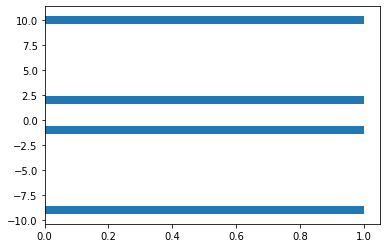

In [46]:
plt.barh([-1,2,10,-9],width=1,)

In [52]:
df = pd.DataFrame(columns=['image','label'])

In [53]:
df.to_csv

,image,label,0
0,NaN,NaN,1.0
1,NaN,NaN,2.0
2,NaN,NaN,3.0
